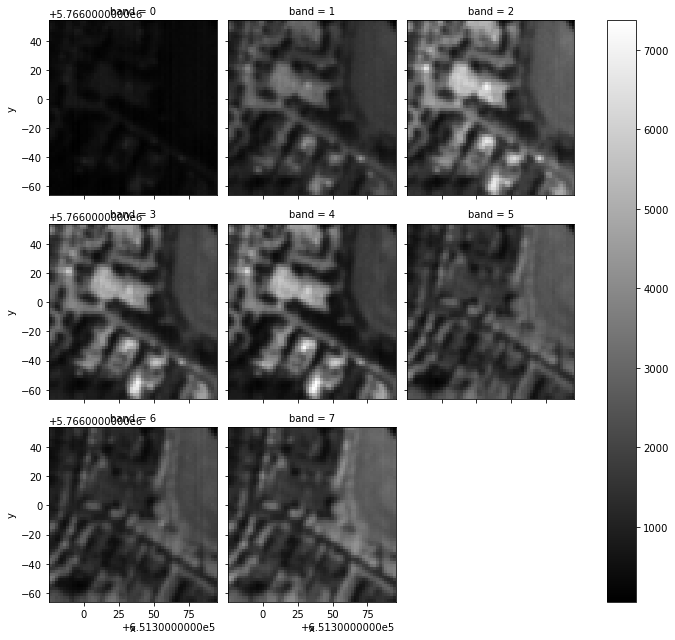

In [1]:
from pyeosim.imager import TdiCmos
from pyeosim.spectral import TreeView_3
from pyeosim.atmosphere import SixSV_atmosphere
from pyeosim.datasets import names, DATA_PATHS
from Py6S import SixS
import xarray

# load, set wavelength as dim coords and rescale to [0..1]
reflectance = xarray.load_dataarray(DATA_PATHS['TEST_HSI_LARGE'])
reflectance = reflectance.swap_dims({'band':'wavelength'}) / 10000

# generate a 6SV atmsophere
atm = SixSV_atmosphere(SixS(), TreeView_3())

# Generate a default TDI CMOS sensor
TreeView_satellite = TdiCmos()

# Perform simulation
imager_output = TreeView_satellite.fit_transform(atm.transform(reflectance))

# plot outputs
imager_output.plot(col='band', col_wrap=3, cmap='gray')